<a href="https://colab.research.google.com/github/ylmgrbzz/-Google-Play-Store-Apps-Analysis-With-Pandas-Numpy-Matplotlib-Seaborn-Pylab/blob/main/SpotifyPlaylistAnalist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
from bs4 import BeautifulSoup


In [2]:
df = pd.read_csv("veri.csv")


In [3]:
print(df.head())


   #                                      Song                        Artist  \
0  1                          Crying Lightning                Arctic Monkeys   
1  2                            Buzzcut Season                         Lorde   
2  3                           Ode To The Mets                   The Strokes   
3  4  Instant Crush (feat. Julian Casablancas)  Daft Punk,Julian Casablancas   
4  5                            I Know The End               Phoebe Bridgers   

   Popularity  BPM                                             Genres  \
0          75  107  garage rock, modern rock, permanent wave, rock...   
1          73  111                 art pop, metropopolis, nz pop, pop   
2          69   92  alternative rock, garage rock, modern rock, pe...   
3          78  110            electro, filter house, rock, indie rock   
4           0  111                    indie pop, la indie, pov: indie   

               Parent Genres                   Album  Album Date   Time  ...  \


In [84]:
import requests
from bs4 import BeautifulSoup
import csv


# Web sitesinin URL'si
url = "https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG"

# Web sitesinden sayfayı indir
response = requests.get(url)

# İndirilen sayfanın HTML içeriğini BeautifulSoup kütüphanesi ile parse et
soup = BeautifulSoup(response.text, 'html.parser')

# CSV dosyasını oluştur
with open('veri_seti.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)

    # Başlık satırını yaz
    header = ['#', 'Song', 'Artist', 'Popularity', 'BPM', 'Genres', 'Parent Genres', 'Album', 'Album Date', 'Time', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Key', 'Time Signature', 'Added At', 'Spotify Track Id', 'Album Label', 'Camelot', 'Spotify Track Img', 'Song Preview']
    writer.writerow(header)

    # Veriyi çek ve CSV dosyasına yaz
    for row in soup.select('tbody tr'):
        data = [td.get_text(strip=True) for td in row.select('td')]
        writer.writerow(data)


In [25]:
# CSV dosyasını oku ve veri çerçevesini oluştur
df = pd.read_csv('veri.csv')

In [26]:
# 2pts - İlk 3 satırı göster
print("#2pts - Show the first 3 rows:")
print(df.head(3))
print("\n")

#2pts - Show the first 3 rows:
   #              Song          Artist  Popularity  BPM  \
0  1  Crying Lightning  Arctic Monkeys          75  107   
1  2    Buzzcut Season           Lorde          73  111   
2  3   Ode To The Mets     The Strokes          69   92   

                                              Genres    Parent Genres  \
0  garage rock, modern rock, permanent wave, rock...             Rock   
1                 art pop, metropopolis, nz pop, pop  Pop, Electronic   
2  alternative rock, garage rock, modern rock, pe...             Rock   

              Album  Album Date   Time  ...  Live  Loud          Key  \
0            Humbug  2009-08-20  03:44  ...    20    -4      E Minor   
1      Pure Heroine  2013-09-27  04:06  ...    10   -11  C♯/D♭ Major   
2  The New Abnormal  2020-04-10  05:51  ...    10    -5  C♯/D♭ Minor   

   Time Signature    Added At        Spotify Track Id  \
0               4  2023-10-11  6wVWJl64yoTzU27EI8ep20   
1               4  2023-10-11  51QEy

In [27]:
# 1pts - Veri çerçevesinin bilgilerini göster
print("#1pts - Show the info of dataframe:")
print(df.info())
print("\n")

#1pts - Show the info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  326 non-null    int64 
 1   Song               326 non-null    object
 2   Artist             326 non-null    object
 3   Popularity         326 non-null    int64 
 4   BPM                326 non-null    int64 
 5   Genres             322 non-null    object
 6   Parent Genres      321 non-null    object
 7   Album              326 non-null    object
 8   Album Date         326 non-null    object
 9   Time               326 non-null    object
 10  Dance              326 non-null    int64 
 11  Energy             326 non-null    int64 
 12  Acoustic           326 non-null    int64 
 13  Instrumental       326 non-null    int64 
 14  Happy              326 non-null    int64 
 15  Speech             326 non-null    int64 
 16  Live    

In [28]:
# 2pts - Sayısal sütunların istatistiksel özetini göster
print("#2pts - Give the statistical summary of numerical columns:")
print(df.describe())
print("\n")

#2pts - Give the statistical summary of numerical columns:
                #  Popularity         BPM       Dance      Energy    Acoustic  \
count  326.000000   326.00000  326.000000  326.000000  326.000000  326.000000   
mean   163.500000    50.41411  122.990798   54.895706   60.478528   28.245399   
std     94.252321    23.10292   25.101822   14.852345   20.385164   29.670725   
min      1.000000     0.00000   66.000000   11.000000   10.000000    0.000000   
25%     82.250000    40.00000  106.000000   45.000000   45.000000    2.000000   
50%    163.500000    55.00000  122.500000   55.000000   61.000000   17.000000   
75%    244.750000    66.00000  138.000000   66.000000   77.000000   51.750000   
max    326.000000    93.00000  200.000000   89.000000   98.000000   96.000000   

       Instrumental       Happy      Speech        Live        Loud  \
count    326.000000  326.000000  326.000000  326.000000  326.000000   
mean      13.380368   43.625767    0.858896   12.055215   -8.128834  

In [29]:
# Top 10 en sık geçen türleri belirle ve sayılarını göster
top_genres = df['Genres'].str.split(', ', expand=True).stack().value_counts().nlargest(10)
print("Top 10 genres with their counts:")
print(top_genres)
print("\n")

Top 10 genres with their counts:
indie rock        113
modern rock       104
art pop            80
rock               74
indie pop          64
chamber pop        58
permanent wave     48
pov: indie         41
indietronica       38
garage rock        37
dtype: int64




In [30]:
# 10'dan fazla görünen türler arasında 5 en popüler türü belirle ve ortalama popülerlik puanlarıyla göster
top_genres_over_10 = df['Genres'].str.split(', ', expand=True).stack().value_counts()[df['Genres'].str.split(', ', expand=True).stack().value_counts() > 10]
top_genres_popularity = df[df['Genres'].str.split(', ', expand=True).isin(top_genres_over_10.index).any(axis=1)].groupby('Genres')['Popularity'].mean().nlargest(5)
print("Top 5 genres with their average popularity score (appearing more than 10 times):")
print(top_genres_popularity)
print("\n")

Top 5 genres with their average popularity score (appearing more than 10 times):
Genres
pop                                                                                            88.833333
alternative rock, funk metal, funk rock, permanent wave, rock                                  86.000000
art pop, art rock, baroque pop, new wave pop, permanent wave, piano rock, singer-songwriter    85.000000
album rock, classic rock, mellow gold, rock                                                    84.000000
madchester, new wave, permanent wave, rock, uk post-punk                                       83.000000
Name: Popularity, dtype: float64




In [31]:
# Popülerlik ve BPM kategorileri için yeni sütunları oluştur ve değer sayılarını göster
df['Popularity_Category'] = pd.cut(df['Popularity'], bins=[df['Popularity'].min(), df['Popularity'].quantile(0.25), df['Popularity'].quantile(0.75), df['Popularity'].max()], labels=['Low', 'Medium', 'High'])
df['BPM_Category'] = pd.cut(df['BPM'], bins=[df['BPM'].min(), 100, 130, df['BPM'].max()], labels=['Slow', 'Medium', 'Fast'])
print("Value counts for 'Popularity_Category' and 'BPM_Category':")
print("Popularity_Category:")
print(df['Popularity_Category'].value_counts())
print("\nBPM_Category:")
print(df['BPM_Category'].value_counts())
print("\n")

Value counts for 'Popularity_Category' and 'BPM_Category':
Popularity_Category:
Medium    163
High       79
Low        56
Name: Popularity_Category, dtype: int64

BPM_Category:
Medium    151
Fast      107
Slow       67
Name: BPM_Category, dtype: int64




In [78]:
# 'Crying Lightning' şarkısını filtrele
crying_lightning = df[df['Song'] == 'Crying Lightning']
print("Filtering for 'Crying Lightning' by Arctic Monkeys:")
print(crying_lightning)
print("\n")

Filtering for 'Crying Lightning' by Arctic Monkeys:
   #              Song          Artist  Popularity  BPM  \
0  1  Crying Lightning  Arctic Monkeys          75  107   

                                              Genres Parent Genres   Album  \
0  garage rock, modern rock, permanent wave, rock...          Rock  Humbug   

   Album Date   Time  ...      Key  Time Signature    Added At  \
0  2009-08-20  03:44  ...  E Minor               4  2023-10-11   

         Spotify Track Id          Album Label  Camelot  \
0  6wVWJl64yoTzU27EI8ep20  Domino Recording Co       9A   

                                   Spotify Track Img  \
0  https://p.scdn.co/mp3-preview/2c7443ba5baef95b...   

                                        Song Preview Popularity_Category  \
0  https://i.scdn.co/image/ab67616d00004851f65d72...                High   

   BPM_Category  
0        Medium  

[1 rows x 28 columns]




In [33]:
# 'High' popülerlik, 'Fast' BPM ve yüksek ses düzeyindeki şarkılardan en yaygın albümü bul
common_album = df[(df['Popularity_Category'] == 'High') & (df['BPM_Category'] == 'Fast') & (df['Loud'] > df['Loud'].quantile(0.75))]['Album'].mode().iloc[0]
print("Most common album among tracks with 'High' popularity, 'Fast' BPM, and above the 75th percentile in loudness:")
print(common_album)
print("\n")

Most common album among tracks with 'High' popularity, 'Fast' BPM, and above the 75th percentile in loudness:
Favourite Worst Nightmare




In [34]:
# En yüksek popülerliğe sahip olan şarkılara ait Camelot kodunu göster
top_10_percent_popularity_camelot = df[df['Popularity'] > df['Popularity'].quantile(0.9)]['Camelot'].mode().iloc[0]
print("Camelot code most common among tracks belonging to the top 10% in terms of popularity:")
print(top_10_percent_popularity_camelot)
print("\n")

Camelot code most common among tracks belonging to the top 10% in terms of popularity:
10B




In [43]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

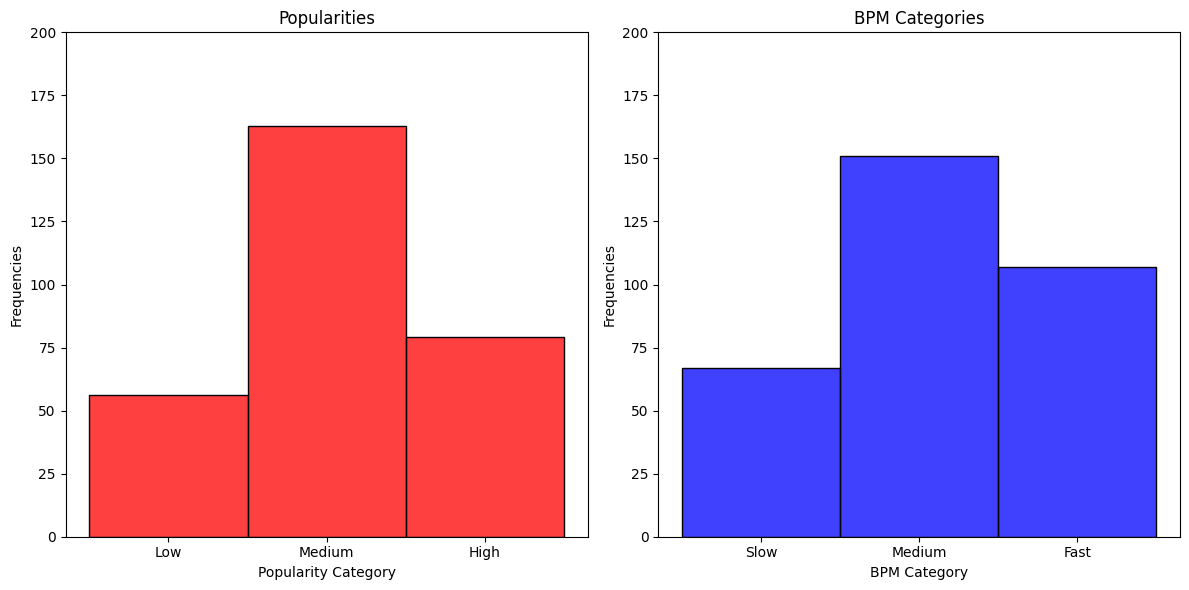

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Create a subplot matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# First subplot - Popularity_Category
sns.histplot(df['Popularity_Category'], bins=30, color='red', ax=axes[0])
axes[0].set_title('Popularities')
axes[0].set_ylabel('Frequencies')
axes[0].set_xlabel('Popularity Category')
axes[0].set_ylim(0, 200)

# Second subplot - BPM_Category
sns.histplot(df['BPM_Category'], bins=30, color='blue', ax=axes[1])
axes[1].set_title('BPM Categories')
axes[1].set_ylabel('Frequencies')
axes[1].set_xlabel('BPM Category')
axes[1].set_ylim(0, 200)

plt.tight_layout()
plt.show()


(0.0, 200.0)

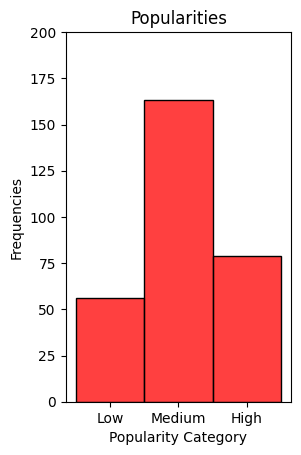

In [44]:
plt.subplot(1, 2, 1)
sns.histplot(df['Popularity_Category'], bins=30, color='red')
plt.title('Popularities')
plt.ylabel('Frequencies')
plt.xlabel('Popularity Category')
plt.ylim(0, 200)

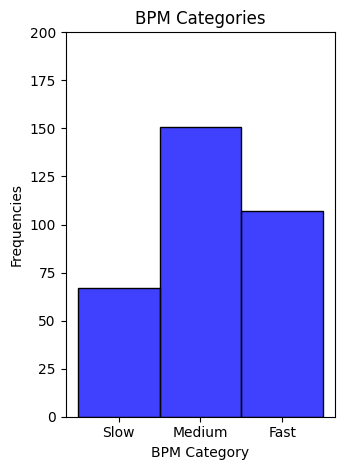

In [45]:
# Subplot 2 - BPM Category
plt.subplot(1, 2, 2)
sns.histplot(df['BPM_Category'], bins=30, color='blue')
plt.title('BPM Categories')
plt.ylabel('Frequencies')
plt.xlabel('BPM Category')
plt.ylim(0, 200)

plt.tight_layout()
plt.show()

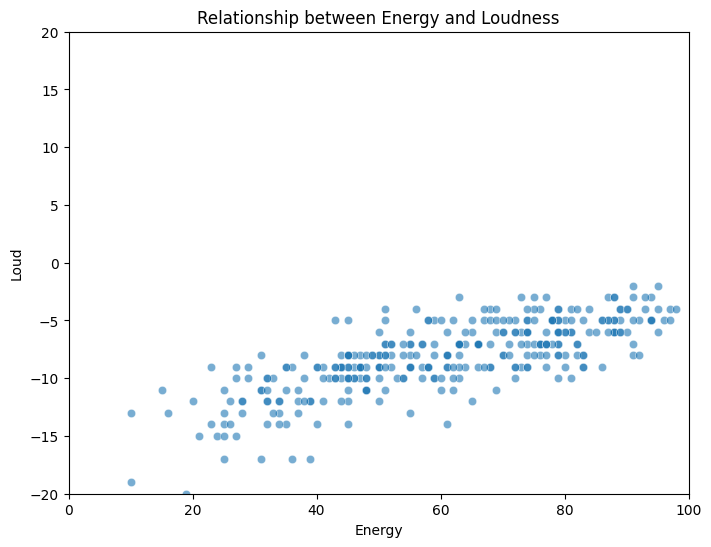

In [72]:
# Assuming the actual loud column name is 'Loudness' (case-sensitive)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Energy', y='Loud', data=df, alpha=0.6)
plt.title('Relationship between Energy and Loudness')
plt.xlabel('Energy')
plt.ylabel('Loud')
plt.xlim(0, 100)
plt.ylim(-20, 20)
plt.show()


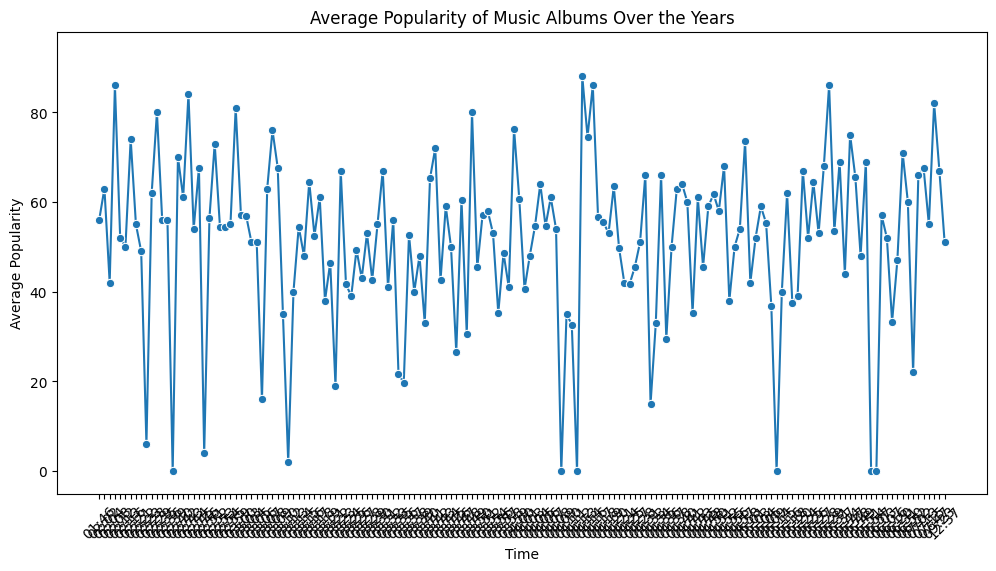

In [58]:
# Task 3
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Popularity', data=df.groupby('Time')['Popularity'].mean().reset_index(), marker='o')
plt.title('Average Popularity of Music Albums Over the Years')
plt.xlabel('Time')
plt.ylabel('Average Popularity')
plt.ylim(df['Popularity'].min() - 5, df['Popularity'].max() + 5)
plt.xticks(rotation=45)
plt.show()


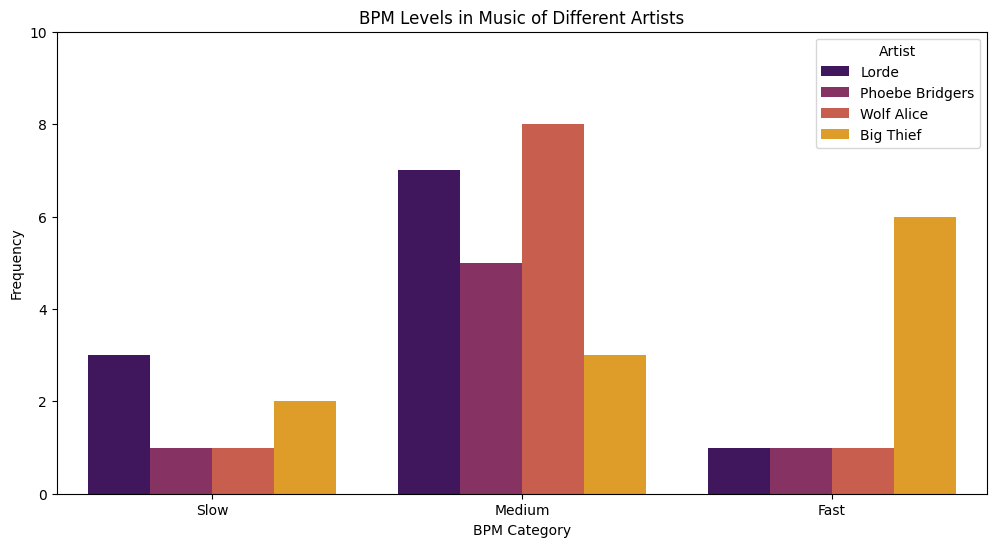

In [49]:
# Task 5
plt.figure(figsize=(12, 6))
artists = ['Lorde', 'Big Thief', 'Wolf Alice', 'Phoebe Bridgers']
sns.countplot(x='BPM_Category', hue='Artist', data=df[df['Artist'].isin(artists)], palette='inferno')
plt.title('BPM Levels in Music of Different Artists')
plt.xlabel('BPM Category')
plt.ylabel('Frequency')
plt.ylim(0, 10)
plt.show()

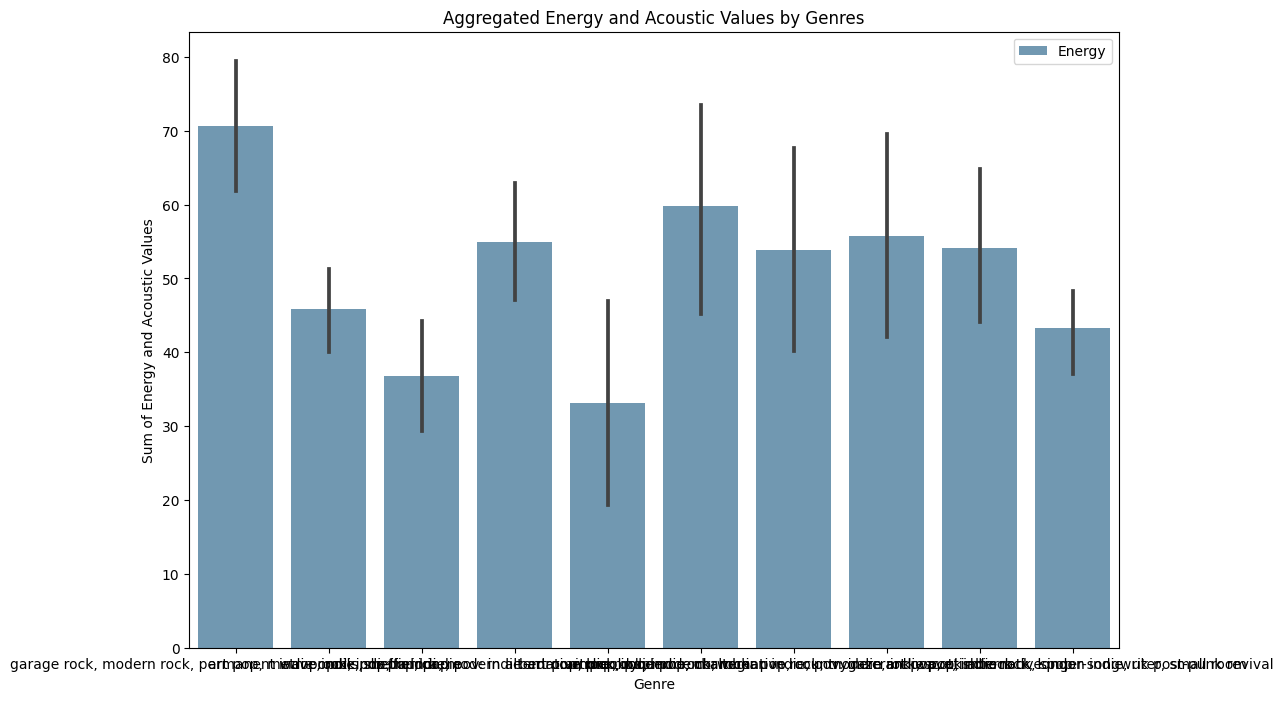

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a 'Genre' column in your DataFrame
top_genres = df['Genres'].value_counts().head(10).index
df_top_genres = df[df['Genres'].isin(top_genres)]

# Calculate cumulative sum of 'Energy' for stacking
energy_cumsum = df_top_genres.groupby('Genres')['Energy'].transform('cumsum')

plt.figure(figsize=(12, 8))
sns.barplot(x='Genres', y='Energy', data=df_top_genres, color='#669bbc', label='Energy')
plt.title('Aggregated Energy and Acoustic Values by Genres')
plt.xlabel('Genre')
plt.ylabel('Sum of Energy and Acoustic Values')
plt.legend()
plt.show()


<ipython-input-51-e000cc3ba0d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='inferno', annot=True)


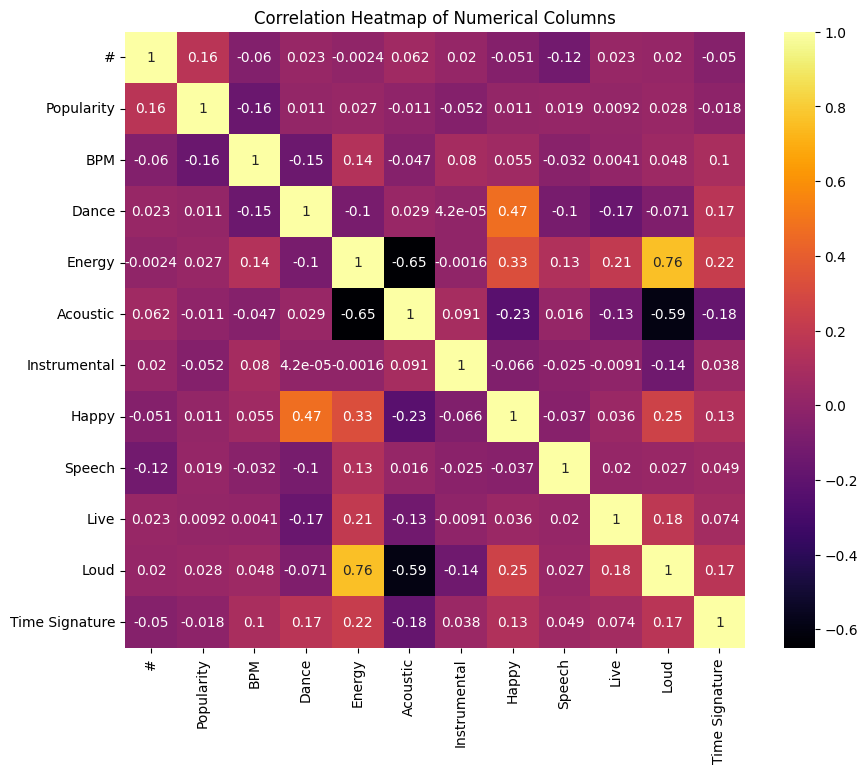

In [51]:
# Task 7
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='inferno', annot=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

HTML content: 
<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Access denied
  </title>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <link href="/cdn-cgi/styles/errors.css" media="screen" rel="stylesheet"/>
  <script>
   (function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener("DOMC
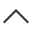

In [91]:
url = "https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
html_content = soup.prettify()
print("HTML content: ")
print(html_content)

In [92]:
pip install chardet


In [93]:
import requests
from bs4 import BeautifulSoup
import chardet

url = "https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
}

response = requests.get(url, headers=headers)

# response'dan karakter setini belirle
detected_encoding = chardet.detect(response.content)['encoding']

# HTML içeriğini belirlenen karakter setiyle çözümle
soup = BeautifulSoup(response.content, 'html.parser', from_encoding=detected_encoding)
html_content = soup.prettify()

print("HTML content: ")
print(html_content)


HTML content: 
ӊ ��q)e��.P
	E���t�r%��Q��xD�o�h&lt;O'&lt;��_t��7RWw
��H4C�nyN������D�"9�F��މ��IMv.��9,A��9SH�*��;%���i��J��	o�8'j۲H������h�DM���f��.bl{��ʀ����.�(}Fy�l���w4���O��6���cY��Q�E�3j�Sdm]�}8�������Hm�&amp;J�GB��)2���p� �k'�
��x��`ȿG��4A/Q�&amp;Q�O�}Wh��&gt;|���еc�n�
���s�ն'��~��UE|C�Mo\�ކ��PS�'������g�Wϱ�E��̄�AQ��k���`�Ii��*�^3:-��d�g�
 �� x�Y�n��H|�"���߇cv
<e�uԉ2|�   �s�xd%|e?k�����la~="" `�_'="" �4��뇤�˩���g�q�`wnk�lע����xwl�ȩs��i="" �qz<e���c.�b="">
 �.W�x��(�������1�"�a�y����6����!3&gt;�^�8lW�����[z�h�R�lŒ�ʟ�w��*�B_���%�Æ���i�@��`$I
�lT�0q]lA��	�wy����־�5}�@2p;�]u�ޅ�7��o�g����=���v�`SL��K=�l�x�6���ة�aeݭA����G��:;$%�c���
B���������z�u����$�R�E��Ǐ8VP�
N�{m��� �"hߔ0�FU�8-�F&amp;���}�*W
o| 9����y7����A�N�f�e�)���;�was
�5��g]��Uas�=`�� m�f�Y�Pe?Ջ��j�69��P��}p�`�.ڌ����j"��{��A6&lt;�џ��&lt;)o��G��[�ӹ�O��]/�,*����ͣ�8�yp��^;;�����X�I2;VM�كIX���s�*�:x�[B�Yz�f=��	t5���f�I
�U�虼x�Ӌcg*H�

In [94]:
import requests
from bs4 import BeautifulSoup

url = "https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
}

response = requests.get(url, headers=headers)

# Karakter setini belirleme işlemi
detected_encoding = response.apparent_encoding

# HTML içeriğini belirlenen karakter setiyle çözümle
soup = BeautifulSoup(response.text, 'html.parser', from_encoding=detected_encoding)
html_content = soup.prettify()

print("HTML content: ")
print(html_content)


HTML content: 
U��8�1��&amp;J�?������,д`1MR�y��J`h�8�ZIP��G�f����x����v2d����a۽��cc?ʛ�öVhP�)�	l��������[�U��gz��aۖy&lt;SK;q��q��_�ff�.�Y0�憕n���U�a����v���p�o���&gt;C�m�o�c]�_a֎y�+l���ܻ�8����D��Pn�&amp;���Ja$t�u�N$BR��d$�@�ϐ���8!0Qx�%� ���Z�Ě�7��_c�Ny��]��U&gt;N����~���~��Uyt��]k��G�$i��)�N���~�	,�3��_ɦ��ve��zr�(�=�6Sf5�?Y���5�L��R&amp; �(
���gh�yK�7p�!:}���'
P��P7���Α���)LN����X�1�8����g���&amp;�����7�1
i;+7�b/�&amp;��X�%g�:(5��)�1]��n!�x�q��-i)Q�Ln@��* ��xL��8k��y�O��#˅3D��6�fj��)$��v���t��
��}י%��Bg�ި����a~�S]z��Tz�s4�]�� ��l��B��	���ZØB��/p�&amp;T�2�uɶADx�aٙSv����fg*:��$�����yC�sܐ��Y�*b&lt;4i1�����S�,��;@�ez���T��`3�U�Z�Z�$��������	"2�t�-�8��6Z�=�w��1
�ma�"��50YJ�X����pOTV��!�h�!�1݊[�Z2i�����fy��&amp;�6n�t��8-J=x2nTQ��a�,h�5
k���Z�!ȇs�	O�F���_+'EK���hf&lt;Jxu�7b��g��0��Yw�A��l��x2�y��|�z=�c�p��Ez�:�pj�s4�e8
�|^�B^�ŝB#4�_H��HU���u�w
�K��0�g�йf�,($��/iƇ��5S=q�~:{�ك�z2�d=��7A ���D�Ԩ�RA$�*�